In [2]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

Анализируем время в процентах которое проводят в в корпоративной информационной системе (КИС) работники четырех отделов компании: A - HR, B- маркетинг и реклама,  С - юристы, D - логистика. Строки - показатели в процентах работы от общего рабочего времени для пяти рабочих дней в течении одной рабочей  недели.

**Нулевая гипотеза:** среднее время использования КИС для всех отделов компании не различается.
**Альтернативная гипоотеза:** среднее время использования КИС отделами компании различается.

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


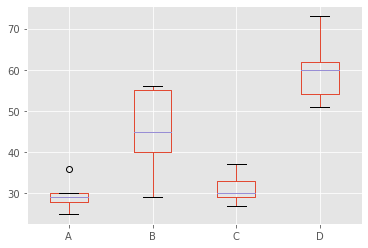

In [120]:
df =\
    pd.DataFrame([[25, 45, 30, 54],
                  [30, 55, 29, 60],
                  [28, 29, 33, 51],
                  [36, 56, 37, 62],
                  [29, 40, 27, 73]],
                 columns=['A', 'B', 'C', 'D'])
display(df)
df.boxplot()
plt.show()

 Используем инструменты однофакторного дисперсионного анализа и теста Тьюки:

По тесту однофакторного дисперсионного анализа :
statistic: 17.493, _pvalue: 0.0000264 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия во времени использования  КИС статистически достоверны:
по крайней мере одно среднее значение группы отличается от остальных.

Тест Тьюки (Tukey HSD) для отделов компании:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


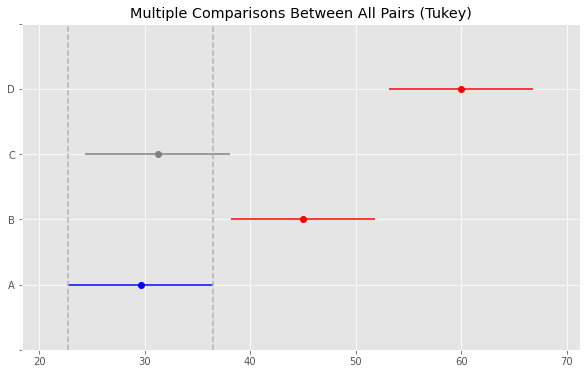

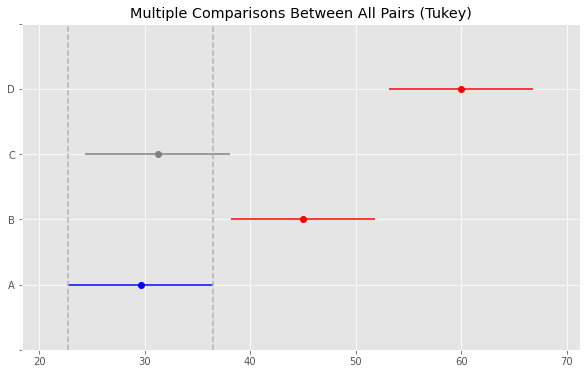

In [122]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

significance = 0.05

value_ANOVA, pvalue = f_oneway(df['A'],df['B'], df['C'], df['D'])

print ('По тесту однофакторного дисперсионного анализа :')
print(f'statistic: {value_ANOVA:.3f}, _pvalue: {pvalue:.7f} заданный уровень значимости: {significance:.3f}')




if pvalue <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия во времени использования  КИС статистически достоверны:')
    print('по крайней мере одно среднее значение группы отличается от остальных.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между  множествами статистически недостоверны. Среднее время использования КИС\
    отделами компании не различается')
print('')



# Можно выполнить тест Тьюки:
groups = ['A','B','C', 'D']
names = [];
# Создаём подписи:
for k1 in range (len(groups)):
    for k2 in range(len(df['A'])):
        names.append(groups[k1])


tukey = pairwise_tukeyhsd(endog=pd.concat([df['A'], df['B'],df['C'], df['D']]).values,
                          groups=names,
                          alpha=0.05)
print ('Тест Тьюки (Tukey HSD) для отделов компании:\n')
print (tukey)
tukey.plot_simultaneous(comparison_name='A')

**Выводы:** Среднее время использование КИС компании статистически различается для всех отделов кроме отдела кадров и юристов. Наибольшее время использования - у отдела логистики. Меньше всего используют КИС юристы и кадровики.

<div class="alert alert-info">
<b>Задача: </b>    
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [ ]:
ПЕРЕДЕЛАТЬ НА СЕМПЛЫ!!!!

Исходный датасет:


,tillamook,newport,petersburg,magadan,tvarminne
0,0.0571,0.0873,0.0974,0.1033,0.0703
1,0.0813,0.0662,0.1352,0.0915,0.1026
2,0.0831,0.0672,0.0817,0.0781,0.0956
3,0.0976,0.0819,0.1016,0.0685,0.0973
4,0.0817,0.0749,0.0968,0.0677,0.1039
5,0.0859,0.0649,0.1064,0.0697,0.1045
6,0.0735,0.0835,0.1050,0.0764,NaN
7,0.0659,0.0725,NaN,0.0689,NaN
8,0.0923,NaN,NaN,NaN,NaN
9,0.0836,NaN,NaN,NaN,NaN


Заполнение средними:


,tillamook,newport,petersburg,magadan,tvarminne
0,0.0571,0.0873,0.0974,0.1033,0.0703
1,0.0813,0.0662,0.1352,0.0915,0.1026
2,0.0831,0.0672,0.0817,0.0781,0.0956
3,0.0976,0.0819,0.1016,0.0685,0.0973
4,0.0817,0.0749,0.0968,0.0677,0.1039
5,0.0859,0.0649,0.1064,0.0697,0.1045
6,0.0735,0.0835,0.1050,0.0764,0.0957
7,0.0659,0.0725,0.1034,0.0689,0.0957
8,0.0923,0.0748,0.1034,0.0780,0.0957
9,0.0836,0.0748,0.1034,0.0780,0.0957


По тесту однофакторного дисперсионного анализа :
statistic: 12.927, _pvalue: 0.0000004 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между выборкам статистически достоверны:
по крайней мере одно среднее значение группы отличается от остальных.
Бокс-плоты групп:
Тест Тьюки (Tukey HSD):

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   magadan    newport  -0.0032    0.9 -0.0171  0.0107  False
   magadan petersburg   0.0254  0.001  0.0115  0.0393   True
   magadan  tillamook   0.0022    0.9 -0.0117  0.0161  False
   magadan  tvarminne   0.0177 0.0065  0.0038  0.0316   True
   newport petersburg   0.0286  0.001  0.0147  0.0425   True
   newport  tillamook   0.0054   0.78 -0.0085  0.0193  False
   newport  tvarminne   0.0209  0.001   0.007  0.0348   True
petersburg  tillamook  -0.0232 

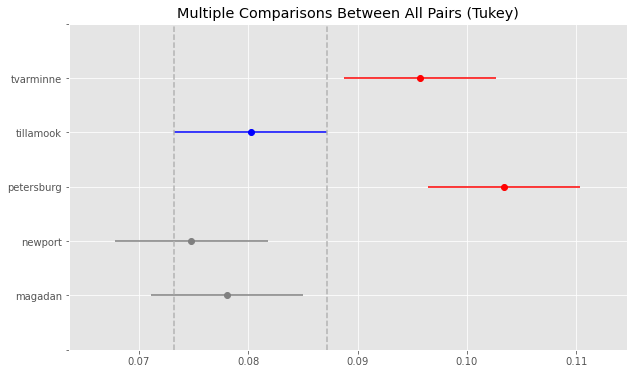

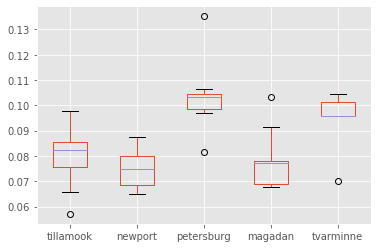

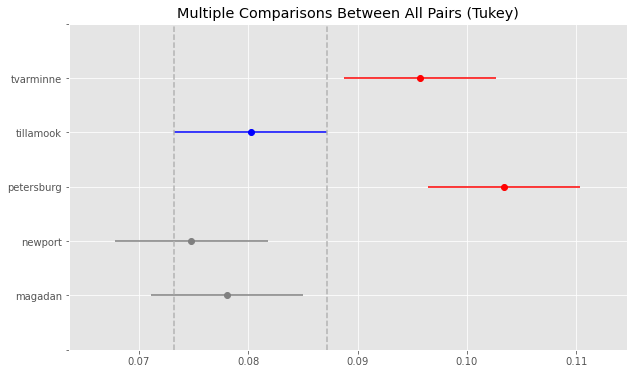

In [5]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976,
             0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]



df_musel = pd.DataFrame({'tillamook': pd.Series(tillamook), 
                         'newport': pd.Series(newport),
                         'petersburg': pd.Series(petersburg),
                         'magadan': pd.Series(magadan),
                         'tvarminne': pd.Series(tvarminne)
                        })

print('Исходный датасет:')
display(df_musel)


significance = 0.05
# Выровняем средними значениями:
df_musel.fillna(df_musel.mean(numeric_only=True).round(4), inplace=True)

print('Заполнение средними:')
display(df_musel)

 

Можно выделить две группы : 

первая  - ***'tillamook',  'newport', 'magadan'***

вторая  - ***'petersburg', 'tvarminne'***.
Тест Тьюки гороврит о равенстве средних значений в указанных группах.

# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

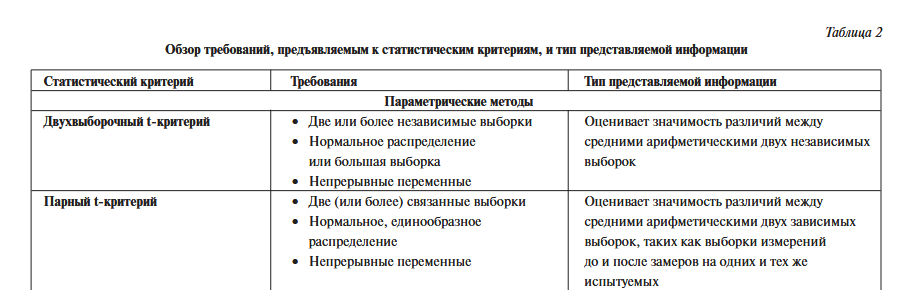

Для **Задачи 1** есть смысл применить  двухвыборочный t-критерий (https://www.clinvest.ru/jour/article/viewFile/392/374):

По двухвыборочному t-тесту Стьюдента:
t_value: -1.734, _pvalue: 0.085 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы не можем отвергнуть нулевую гипотезу.
Различия между двумя множествами статистически недостоверны.



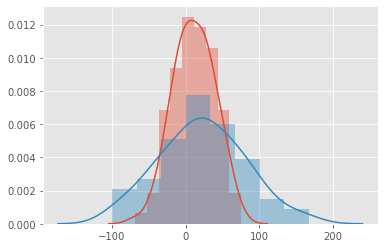

In [119]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.
significance = 0.05

tvalueSt, pvalueSt = stats.ttest_ind(A,B)
print ('По двухвыборочному t-тесту Стьюдента:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')



if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')
print('')



sns.distplot(A)
sns.distplot(B)

plt.show()


<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

Для решения **Задачи 2** применим  t-критерий Стьюдента для зависимых переменных:

По тесту Стьюдента для зависимых переменных :
t_value: -2.170, _pvalue: 0.032 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между двумя множествами статистически достоверны.



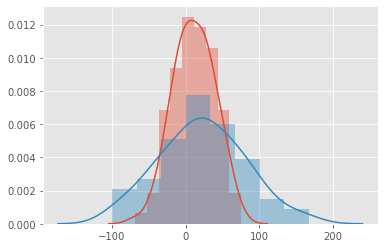

In [118]:

np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

significance = 0.05

tvalueSt, pvalueSt = stats.ttest_rel(A,B)
print ('По тесту Стьюдента для зависимых переменных :')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')



if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')
print('')

sns.distplot(A)
sns.distplot(B)

plt.show()


<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

Для решения **Задачи 3** применим  используем инструменты ***однофакторного дисперсионного анализа*** и ***теста Тьюки***:

По тесту однофакторного дисперсионного анализа :
statistic: 11.974, _pvalue: 0.0000455 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между  множествами статистически достоверны:
по крайней мере одно среднее значение выборки отличается от остальных.

По двухвыборочному t-тесту Стьюдента:
t_value: 4.186, _pvalue: 0.0001622 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между поливом с удобрениями и поливом  минералкой статистически достоверны.

По двухвыборочному t-тесту Стьюдента:
t_value: -0.247, _pvalue: 0.8062593 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы не можем отвергнуть нулевую гипотезу.
Различия между поливом просто водой и поливом минералкой статистически недостоверны.

Тест Тьюки (Tukey HSD):

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
---------------

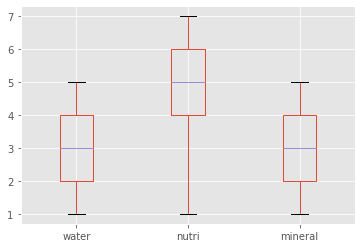

In [117]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

# Ваш код.
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

significance = 0.05
df  = pd.DataFrame(list(zip(water, nutri, mineral)),
               columns =['water', 'nutri', 'mineral'])

value_ANOVA, pvalue = f_oneway(df['water'],df['nutri'], df['mineral'])

print ('По тесту однофакторного дисперсионного анализа :')
print(f'statistic: {value_ANOVA:.3f}, _pvalue: {pvalue:.7f} заданный уровень значимости: {significance:.3f}')



if pvalue <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между  множествами статистически достоверны:')
    print('по крайней мере одно среднее значение выборки отличается от остальных.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между  множествами статистически недостоверны.')
print('')

# Нитраты и минералка
tvalueSt, pvalueSt = stats.ttest_ind(df['nutri'],df['mineral'])
print ('По двухвыборочному t-тесту Стьюдента:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.7f} заданный уровень значимости: {significance:.3f}')



if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между поливом с удобрениями и поливом  минералкой статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между поливом с удобрениями и поливом  минералкой статистически недостоверны.')
print('')

# Минералка и вода
tvalueSt, pvalueSt = stats.ttest_ind(df['mineral'],df['water'])
print ('По двухвыборочному t-тесту Стьюдента:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.7f} заданный уровень значимости: {significance:.3f}')



if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между поливом просто водой и поливом  минералкой статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между поливом просто водой и поливом минералкой статистически недостоверны.')
print('')

# Можно выполнить тест Тьюки:
groups = ['water','nutri','mineral']
names = [];
# Создаём подписи:
for k1 in range (len(groups)):
    for k2 in range(len(df['water'])):
        names.append(groups[k1])


tukey = pairwise_tukeyhsd(endog=pd.concat([df['water'], df['nutri'],df['mineral']]).values,
                          groups=names,
                          alpha=0.05)

df.boxplot()
print ('Тест Тьюки (Tukey HSD):\n')
print (tukey)



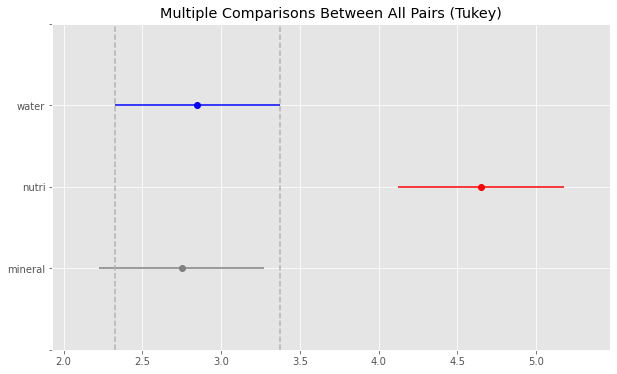

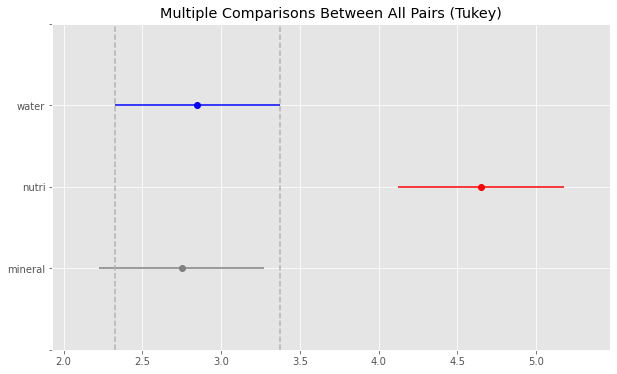

In [9]:
tukey.plot_simultaneous(comparison_name='water')

**Вывод:** Группа *nutri* статистически отличается от групп *mineral* и *water*. В отличии от *mineral* удобрение *nutri* действует.

<div class="alert alert-info">
<b>*Задание*</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гипотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


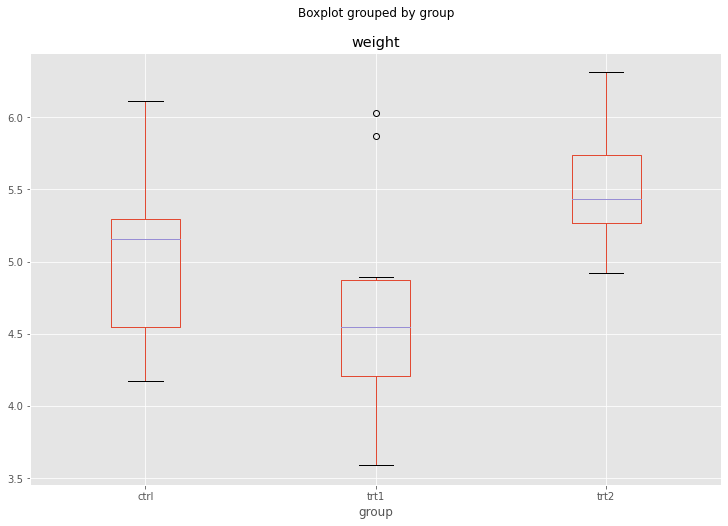

In [10]:
df_plant= pd.read_csv('PlantGrowth.csv')
df_plant.boxplot('weight', by='group', figsize=(12, 8));


tukey = pairwise_tukeyhsd(endog=df_plant['weight'],
                          groups=df_plant['group'],
                          alpha=0.05)
print(tukey)

**Вывод**: Несмотря на то что между удобрениями trt1 и trt2 есть статистически значимые различия, тест Тьюки показывет что ни применение удобрения trt1, ни применение удобрения trt2 не даёт никаких различий с контрольной группой ctrl. Удобрения на урожайность не влияют.

# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [11]:
data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [12]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [13]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034.0,8502.0
gate_40,227857702576,2333530,20119.0,8279.0


In [14]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


In [15]:
# Ваши выводы

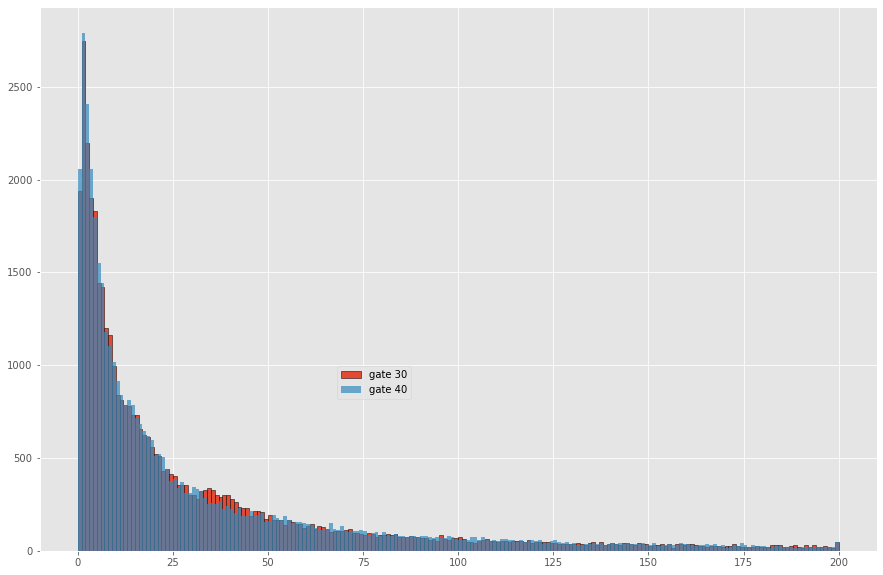

In [16]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

In [17]:
# Ваши выводы/гипотезы

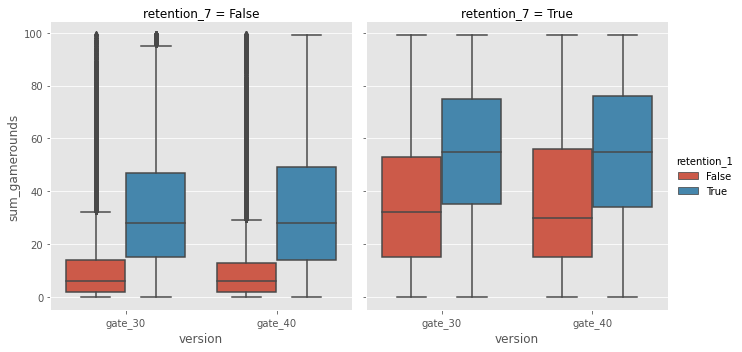

In [18]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [123]:
from scipy.stats import f_oneway
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код.
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'],
                data[data['version'] == 'gate_40']['sum_gamerounds'])
print('f_oneway Statistics=%.3f, p=%.3f' % (f, p))
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print(' mannwhitneyu Statistics=%.3f, p=%.3f' % (stat, p))

f_oneway Statistics=0.794, p=0.373
 mannwhitneyu Statistics=1009027049.500, p=0.025


<div class="alert alert-info">
<b>Задание: Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот. </b>
</div>


In [20]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код.

**Ваши выводы?** 

 Технология Bootstrap https://habr.com/ru/post/192000/

<Figure size 1080x720 with 0 Axes>

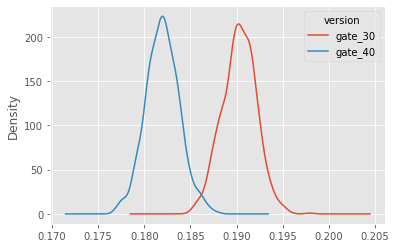

In [21]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [22]:
# сделайте выводы, используя t-тест для retention_1 и retention_7

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [23]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
#pokemon.head()

#pokemon.info()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.
print(pokemon['Class 1'].unique())
print(pokemon['Class 2'].unique())


['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


Выделим классы покемонов **Grass** и **Rock**:

In [24]:
# Выделяем покемонов класса 'Grass' или в 1 классе или во 2 классе и убираем лишних 
# где есть совпадения в классах 'Grass' и 'Rock':
grass_pok = pokemon.loc[((pokemon['Class 1'] =='Grass')&(pokemon['Class 2'] != 'Rock'))
                        |((pokemon['Class 2'] =='Grass')&(pokemon['Class 1'] !='Rock'))] 

print('Покемонов Grass в обоих классах без совпадений c Rock:', len(grass_pok))

display(grass_pok.head(3))
display(grass_pok.tail(3))


Покемонов Grass в обоих классах без совпадений c Rock: 93


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
785,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False
786,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,False
787,788,Gourgeist Super Size,Ghost,Grass,85,100,122,58,75,54,False


In [25]:
# Выделяем покемонов класса 'Rock' или в 1 классе или во 2 классе и сразу
# убираем лишних где есть совпадения в классах 'Grass' и 'Rock'
rock_pok = pokemon.loc[ ((pokemon['Class 1'] =='Rock')&(pokemon['Class 2'] != 'Grass'))
                       |((pokemon['Class 2'] =='Rock')&(pokemon['Class 1'] !='Grass'))] 

print('Покемонов Grass в обоих классах без повторов:', len(rock_pok))
display(rock_pok.head(3))
display(rock_pok.tail(3))


Покемонов Grass в обоих классах без повторов: 56


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
773,774,Carbink,Rock,Fairy,50,50,150,50,150,50,False
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True


Поскольку множества **Grass** и **Rock** имеют неравное количество элементов, необходимо применить семплирование для выравнивания, выбрав случайные значения из датафрейма **grass_pok**:

In [26]:
grass_pok = grass_pok.sample(len(rock_pok))
print ('Из класса покемонов Grass выбрано', len(grass_pok), 'элементов')

Из класса покемонов Grass выбрано 56 элементов


Применим *тест Стьюдента* для сравнения среднего значения силы обычной атаки  (показатель **Attack**):

По двухвыборочному t-тесту Стьюдента:
t_value: -0.247, _pvalue: 0.002 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между двумя множествами статистически достоверны.



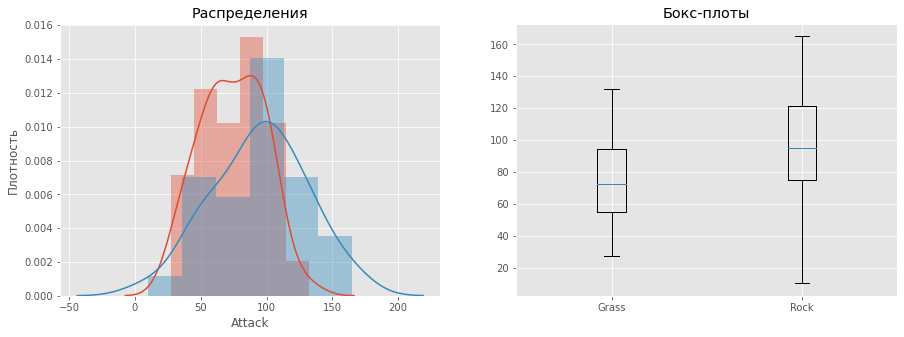

In [115]:
significance = 0.05

valueSt, pvalueSt = stats.ttest_ind(grass_pok['Attack'],rock_pok['Attack'])
print ('По двухвыборочному t-тесту Стьюдента:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')


if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')
print('')



plt.figure(figsize=(15, 5))
plt.subplot(1,2,1).set(title='Распределения')
plt.ylabel('Плотность')
sns.distplot(grass_pok['Attack'])
sns.distplot(rock_pok['Attack'])

plt.subplot(1,2,2).set(title='Бокс-плоты')
plt.boxplot([grass_pok['Attack'], rock_pok['Attack']], labels=['Grass','Rock'])
plt.show()

**Вывод:** Интуиция профессора Оука на высоте - действительно показатели атаки для классов покемонов **Grass** и **Rock** имеют статистически значимую разницу.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда,  что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [28]:
# Выделяем покемонов класса 'Water' или в 1 классе или во 2 классе без Normal во другом классе:

water_pok = pokemon.loc[ ((pokemon['Class 1'] =='Water')&(pokemon['Class 2'] != 'Normal'))|((pokemon['Class 2'] =='Water')&(pokemon['Class 1'] !='Normal'))] 

print('Покемонов Water в обоих классах без совпадений с Normal:', len(water_pok))
display(water_pok.head(3))
display(water_pok.tail(3))


Покемонов Water в обоих классах без совпадений с Normal: 125


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
762,763,Clauncher,Water,NaN,50,53,62,58,63,44,False
763,764,Clawitzer,Water,NaN,71,73,88,120,89,59,False
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,True


In [29]:
# Выделяем покемонов класса 'Normal' или в 1 классе или во 2 классе без 'Water' во другом классе:

normal_pok = pokemon.loc[ ((pokemon['Class 1'] =='Normal')&(pokemon['Class 2'] != 'Water'))
                         |((pokemon['Class 2'] =='Normal')&(pokemon['Class 1'] !='Water'))] 

print('Покемонов Normal в обоих классах без совпадений с Water:', len(normal_pok))
display(normal_pok.head(3))
display(normal_pok.tail(3))


Покемонов Normal в обоих классах без совпадений с Water: 101


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
744,745,Furfrou,Normal,NaN,75,80,60,65,90,102,False
764,765,Helioptile,Electric,Normal,44,38,33,61,43,70,False
765,766,Heliolisk,Electric,Normal,62,55,52,109,94,109,False


Поскольку классы покемонов **Water** и **Normal** имеют неравное количество элементов, необходимо применить семплирование для выравнивания, выбрав случайные значения из большего датафрейма **water**:

In [30]:
water_pok = water_pok.sample(len(normal_pok))
print ('Из класса покемонов Water выбрано', len(water_pok), 'элемент')

Из класса покемонов Water выбрано 101 элемент


Применим *тест Стьюдента* для сравнения среднего значения скорости покемонов классов **Water** (показатель **Speed**):

По двухвыборочному t-тесту Стьюдента:
t_value: -0.247, _pvalue: 0.992 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы не можем отвергнуть нулевую гипотезу.
Различия между двумя множествами статистически недостоверны.



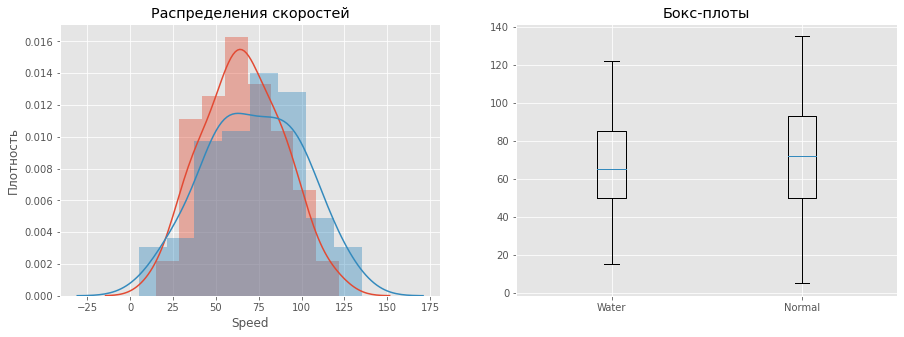

In [114]:
significance = 0.05

valueSt, pvalueSt = stats.ttest_ind(water_pok['Attack'],normal_pok['Attack'])
print ('По двухвыборочному t-тесту Стьюдента:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')


if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')
print('')



plt.figure(figsize=(15, 5))
plt.subplot(1,2,1).set(title='Распределения скоростей')
plt.ylabel('Плотность')
sns.distplot(water_pok['Speed'])
sns.distplot(normal_pok['Speed'])

plt.subplot(1,2,2).set(title='Бокс-плоты')
plt.boxplot([water_pok['Speed'], normal_pok['Speed']], labels=['Water','Normal'])
plt.show()

**Вывод:** Профессор Оука ошибается -  показатели скорости для классов покемонов **Water** и **Normal** не имеют статистически значимой разницы.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

**Замечание:** Профессор Оук не владеет методикой проведения экспериметов. Логичнее было бы замерить скорости покемонов до введения сыворотки и после, а затем применить тест Стьюдента для зависимых выборок. 

Нам же  можно будет попытаться рассмотреть две независимые выборки:
1. **serum_pok** -множество вакцинированных покемонов
2. **odinary_pok** - множество обычных покемонов без вакцины.

In [32]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [33]:
serum_pok =  pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]
print ('Вакцинированные покемоны:')
display(serum_pok)
print ('Всего в датафрейме есть данные о',len(pokemon), 'покемонах')
not_serum_pok = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon)]
print ('Всего в датафрейме есть данные о',len(not_serum_pok), 'невакцинированных покемонах')

Вакцинированные покемоны:


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


Всего в датафрейме есть данные о 800 покемонах
Всего в датафрейме есть данные о 796 невакцинированных покемонах


In [110]:
print (f'Средняя скорость вакционированнных покемонов: {serum_pok["Speed"].mean():.1f}')
print (f'Средняя  невакционированных покемонов:{not_serum_pok["Speed"].mean():.1f}')


Средняя скорость вакционированнных покемонов: 145.0
Средняя  невакционированных покемонов:67.9


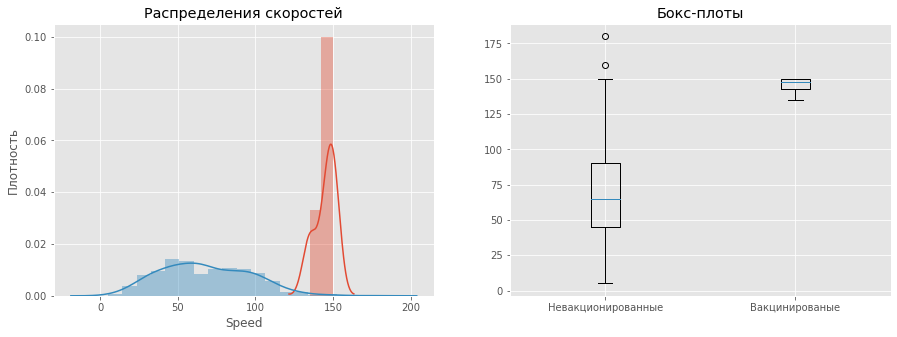

In [113]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1).set(title='Распределения скоростей')
plt.ylabel('Плотность')
sns.distplot(serum_pok['Speed'])
sns.distplot(not_serum_pok['Speed'])

plt.subplot(1,2,2).set(title='Бокс-плоты')
plt.boxplot([not_serum_pok['Speed'], serum_pok['Speed']], labels=['Невакционированные','Вакцинированые'])
plt.show()


**Вывод**: Даже без проведения статистического теста ясно что выборки различаются между собой. Эффрект присутствует. Однако наша рекомендация профессору Оуку следующая - необходимо провести грамотный эксперимент с  применением методики РКИ,  как например описано здесь -https://medspecial.ru/for_patients/8/21282/ и тогда доказательно можно будет судить об эффекте действия вакцины.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

Раделим датасет на легендарных и обычных покемонов. На всякий случай исключим покемонов получавших вакцину, используя уже сформированный ранее датасет невакцинированных покемонов:

In [35]:
print('Всего невакцинированных покемонов:', len(not_serum_pok))
odinary_pok = not_serum_pok.loc[not_serum_pok['Legendary'] == False]
print('Из них обычных покемонов:', len(odinary_pok))
legendary_pok = not_serum_pok.loc[not_serum_pok['Legendary'] == True]
print('Из них редких покемонов:', len(legendary_pok))

Всего невакцинированных покемонов: 796
Из них обычных покемонов: 732
Из них редких покемонов: 64


Добавим в наши датафреймы столбцы: **features_sum** - сумма характеристик и **features_prod** - произведение характеристик:

In [36]:
odinary_pok = odinary_pok.assign(features_sum = odinary_pok['HP'] + odinary_pok['Attack'] + odinary_pok['Defense'])
odinary_pok = odinary_pok.assign(features_prod = odinary_pok['HP'] * odinary_pok['Attack'] * odinary_pok['Defense'])



Применим семплирование для большей выборки обычных покемонов:
    

In [37]:
odinary_pok = odinary_pok.sample(len(legendary_pok))
print ('Из класса обычных покемонов выбрано', len(odinary_pok), 'элемента')

Из класса обычных покемонов выбрано 64 элемента


In [38]:
print('Обычные покемоны:')
print(f'Среднее суммы характеристик HP, Attack, Defense обычных покемонов: {odinary_pok.features_sum.mean():.2f}')
print(f'Среднее произведения характеристик HP, Attack, Defense обычных покемонов: {odinary_pok.features_prod.mean():.2f}')
display(odinary_pok.head(3))

legendary_pok = legendary_pok.assign(features_sum = legendary_pok['HP'] + legendary_pok['Attack'] + legendary_pok['Defense'])
legendary_pok = legendary_pok.assign(features_prod = legendary_pok['HP'] * legendary_pok['Attack'] * legendary_pok['Defense'])

print('Легендарные покемоны:')
print(f'Среднее суммы характеристик HP, Attack, Defense легендарных покемонов: {legendary_pok.features_sum.mean():.2f}')
print(f'Среднее произведения характеристик HP, Attack, Defense легендарных покемонов: {legendary_pok.features_prod.mean():.2f}')
display(legendary_pok.head(3))

Обычные покемоны:
Среднее суммы характеристик HP, Attack, Defense обычных покемонов: 216.39
Среднее произведения характеристик HP, Attack, Defense обычных покемонов: 445856.84


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,features_sum,features_prod
110,111,Exeggcute,Grass,Psychic,60,40,80,60,45,40,False,180,192000
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False,125,72000
652,653,Amoonguss,Grass,Poison,114,85,70,85,80,30,False,269,678300


Легендарные покемоны:
Среднее суммы характеристик HP, Attack, Defense легендарных покемонов: 310.00
Среднее произведения характеристик HP, Attack, Defense легендарных покемонов: 1097050.08


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,features_sum,features_prod
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000


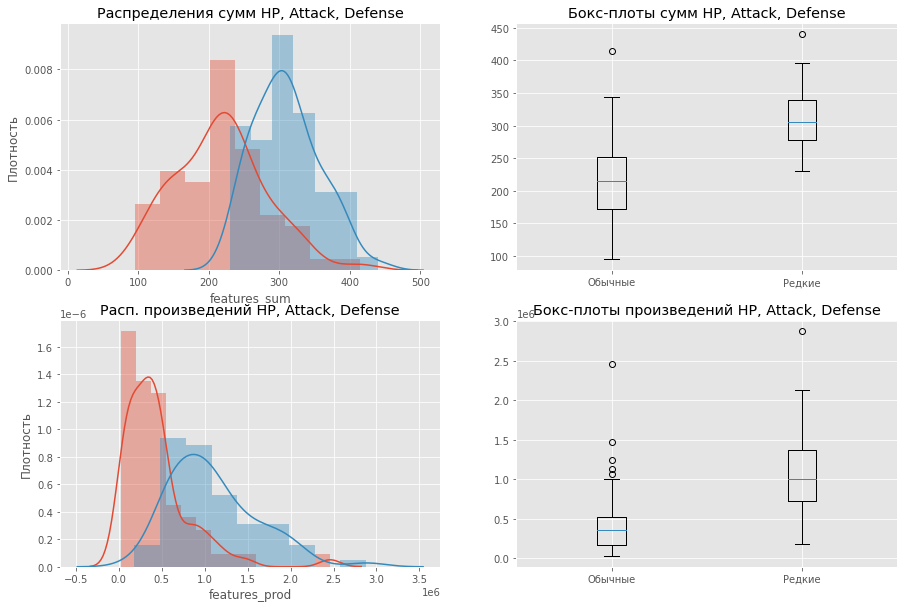

In [107]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1).set(title='Распределения сумм HP, Attack, Defense')
plt.ylabel('Плотность')
sns.distplot(odinary_pok['features_sum'])
sns.distplot(legendary_pok['features_sum'])

plt.subplot(2,2,2).set(title='Бокс-плоты сумм HP, Attack, Defense')
plt.boxplot([odinary_pok['features_sum'], legendary_pok['features_sum']], labels=['Обычные','Редкие'])


plt.subplot(2,2,3).set(title='Расп. произведений HP, Attack, Defense')
plt.ylabel('Плотность')
sns.distplot(odinary_pok['features_prod'])
sns.distplot(legendary_pok['features_prod'])

plt.subplot(2,2,4).set(title='Бокс-плоты произведений HP, Attack, Defense')
plt.boxplot([odinary_pok['features_prod'], legendary_pok['features_prod']], labels=['Обычные','Редкие'])
plt.show()

Убедимся в различих между классами  через тест Стьюдента:

In [40]:
significance = 0.05

valueSt, pvalueSt = stats.ttest_ind(odinary_pok['features_sum'], legendary_pok['features_sum'])
print ('По двухвыборочному t-тесту Стьюдента по показателю сумма характеристик HP, Attack, Defense:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')


if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')
print('')



По двухвыборочному t-тесту Стьюдента по показателю сумма характеристик HP, Attack, Defense:
t_value: -0.247, _pvalue: 0.000 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между двумя множествами статистически достоверны.



In [41]:
significance = 0.05

valueSt, pvalueSt = stats.ttest_ind(odinary_pok['features_prod'], legendary_pok['features_prod'])
print ('По двухвыборочному t-тесту Стьюдента по показателю произведения характеристик HP, Attack, Defense:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')


if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')
print('')



По двухвыборочному t-тесту Стьюдента по показателю произведения характеристик HP, Attack, Defense:
t_value: -0.247, _pvalue: 0.000 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между двумя множествами статистически достоверны.



**Вывод:** Профессор Оук может быть уверен - редкие покемоны действительно лучшие и по сумме и по произведнеию своих характеристик  относительно остальных покемонов.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [42]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [63]:
# Выделяем невакцинарованных покемонов 
# класса 'Rock' или в 1 классе или во 2 классе без 'Ground', 'Steel', 'Ice' во другом классе:

rock_pok = not_serum_pok.loc[((not_serum_pok['Class 1'] =='Rock')&(~not_serum_pok['Class 2'].isin(best_defence_class)))
|((not_serum_pok['Class 2'] =='Rock')&(~not_serum_pok['Class 1'].isin(best_defence_class)))] 



In [64]:
# Выделяем невакцинарованных покемонов 
# класса 'Ground' или в 1 классе или во 2 классе без 'Rock', 'Ground', 'Steel', 'Ice' в другом классе:

ground_pok = not_serum_pok.loc[((not_serum_pok['Class 1'] =='Ground')&(~not_serum_pok['Class 2'].isin(best_defence_class)))
|((not_serum_pok['Class 2'] =='Ground')&(~not_serum_pok['Class 1'].isin(best_defence_class)))] 





In [65]:
# Выделяем невакцинарованных покемонов 
# класса 'Steel' или в 1 классе или во 2 классе без 'Rock', 'Ground', 'Steel', 'Ice' в другом классе:

steel_pok = not_serum_pok.loc[((not_serum_pok['Class 1'] =='Steel')&(~not_serum_pok['Class 2'].isin(best_defence_class)))
|((not_serum_pok['Class 2'] =='Steel')&(~not_serum_pok['Class 1'].isin(best_defence_class)))] 




In [66]:
# Выделяем невакцинарованных покемонов 
# класса 'Ice' или в 1 классе или во 2 классе без 'Rock', 'Ground', 'Steel', 'Ice' в другом классе:

ice_pok = not_serum_pok.loc[((not_serum_pok['Class 1'] =='Ice')&(~not_serum_pok['Class 2'].isin(best_defence_class)))
|((not_serum_pok['Class 2'] =='Ice')&(~not_serum_pok['Class 1'].isin(best_defence_class)))] 



In [71]:
print("Покемонов 'Rock' в обоих классах без совпадений с 'Ground', 'Steel', 'Ice':", len(rock_pok))
print("Покемонов 'Ground' в обоих классах без совпадений с 'Rock', 'Steel', 'Ice':", len(ground_pok))
print("Покемонов 'Steel' в обоих классах без совпадений с 'Rock', 'Ground', 'Ice':", len(steel_pok))
print("Покемонов 'Ice' в обоих классах без совпадений с 'Rock', 'Ground', 'Steel':", len(ice_pok))


Покемонов 'Rock' в обоих классах без совпадений с 'Ground', 'Steel', 'Ice': 41
Покемонов 'Ground' в обоих классах без совпадений с 'Rock', 'Steel', 'Ice': 52
Покемонов 'Steel' в обоих классах без совпадений с 'Rock', 'Ground', 'Ice': 40
Покемонов 'Ice' в обоих классах без совпадений с 'Rock', 'Ground', 'Steel': 33


Таким образом наиболее малочисленный класс - это класс **Ice** и по нему нужно выстраивать семплы остальных классов:


In [79]:
min_class_len = min([len(rock_pok), len(ground_pok), len(steel_pok), len(ice_pok)])

rock_pok = rock_pok.sample(min_class_len)
ground_pok = ground_pok.sample(min_class_len)
steel_pok = steel_pok.sample(min_class_len)
print ("Из класса покемонов 'Rock'   выбрано", len(rock_pok), "элемента")
print ("Из класса покемонов 'Ground' выбрано", len(ground_pok), "элемента")
print ("Из класса покемонов 'Steel'  выбрано", len(steel_pok), "элемента")

Из класса покемонов 'Rock'   выбрано 33 элемента
Из класса покемонов 'Ground' выбрано 33 элемента
Из класса покемонов 'Steel'  выбрано 33 элемента


In [92]:
print ("Среднее класса покемонов 'Rock'  ", round(rock_pok['Defense'].mean(),2))
print ("Среднее класса покемонов 'Ground'", round(ground_pok['Defense'].mean(),2))
print ("Среднее класса покемонов 'Steel' ", round(steel_pok['Defense'].mean(),2))
print ("Среднее класса покемонов 'Ice'   ", round(ice_pok['Defense'].mean(),2))

Среднее класса покемонов 'Rock'   102.7
Среднее класса покемонов 'Ground' 83.42
Среднее класса покемонов 'Steel'  110.24
Среднее класса покемонов 'Ice'    78.52


Используем однофакторный дисперсионный тест: 

In [82]:
significance = 0.05

value_ANOVA, pvalue = f_oneway(rock_pok['Defense'],
                               ground_pok['Defense'],
                               steel_pok['Defense'], 
                               ice_pok['Defense']
                               )

print ('По тесту однофакторного дисперсионного анализа :')
print(f'statistic: {value_ANOVA:.3f}, _pvalue: {pvalue:.7f} заданный уровень значимости: {significance:.3f}')


if pvalue <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между выборкам статистически достоверны:')
    print('по крайней мере одно среднее значение группы отличается от остальных.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между  множествами статистически недостоверны.')
#print('Бокс-плоты групп:')


По тесту однофакторного дисперсионного анализа :
statistic: 6.120, _pvalue: 0.0006359 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между выборкам статистически достоверны:
по крайней мере одно среднее значение группы отличается от остальных.


Для понимания что от чего отличается выполним **тест Тьюки**:
    

Тест Тьюки (Tukey HSD):

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice  -4.9091    0.9 -27.4913 17.6732  False
Ground   Rock  19.2727 0.1231  -3.3095  41.855  False
Ground  Steel  26.8182 0.0129   4.2359 49.4004   True
   Ice   Rock  24.1818 0.0308   1.5996 46.7641   True
   Ice  Steel  31.7273 0.0021    9.145 54.3095   True
  Rock  Steel   7.5455 0.7975 -15.0368 30.1277  False
-----------------------------------------------------


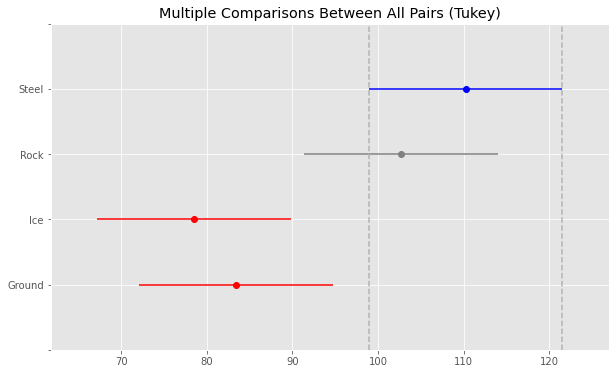

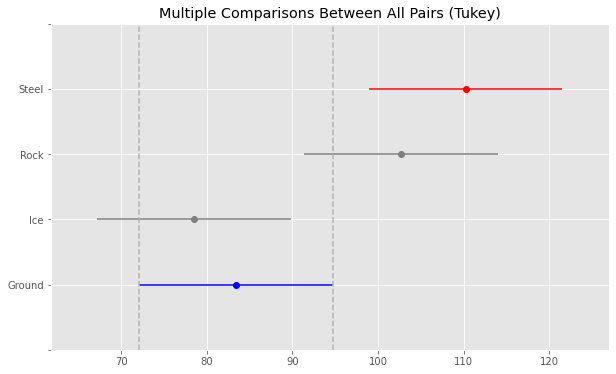

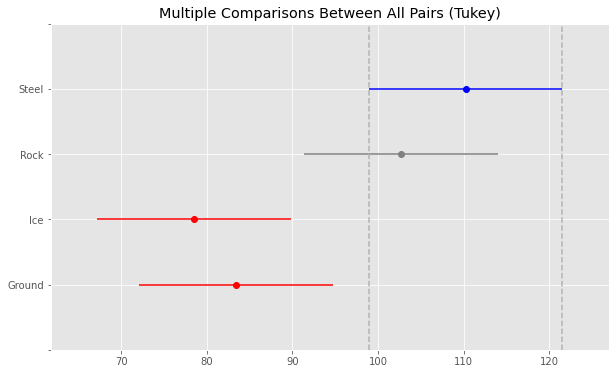

In [94]:
groups = ['Rock', 'Ground', 'Steel', 'Ice']
names = [];
# Создаём подписи:
for k1 in range (len(groups)):
    for k2 in range(len(rock_pok['Defense'])):
        names.append(groups[k1])

tukey = pairwise_tukeyhsd(endog=pd.concat([rock_pok['Defense'], 
                                           ground_pok['Defense'],
                                           steel_pok['Defense'], 
                                           ice_pok['Defense']]).values,
                          groups=names,
                          alpha=0.05)

print ('Тест Тьюки (Tukey HSD):\n')
print (tukey)
tukey.plot_simultaneous(comparison_name='Ground')
tukey.plot_simultaneous(comparison_name='Steel')

**Вывод:** Значительные отличия в уровне защиты наблюдаются у класса **Steel**. Класс **Rock** находится в промежуточном положении между **Steel** и группой **Ice** и **Ground**.

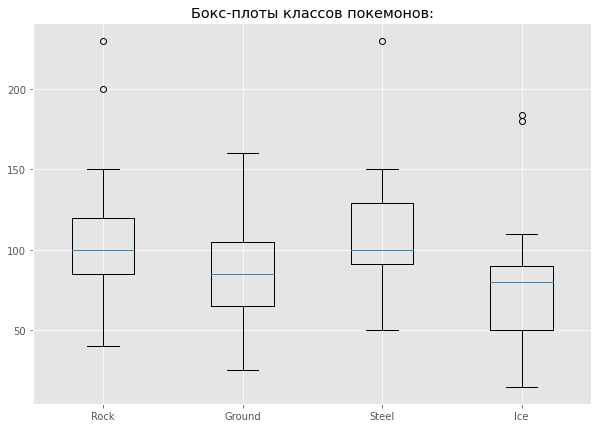

In [106]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Бокс-плоты классов покемонов:')
ax.boxplot([rock_pok['Defense'],  ground_pok['Defense'],
             steel_pok['Defense'], ice_pok['Defense']], labels=groups)
plt.show()